In [10]:
# https://www.kaggle.com/competitions/pgsfashionmnist
import pandas as pd
from img_classificator import SimpleImgClassificatorManager
from keras.optimizers import RMSprop

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep=',')
kaggle_test_df = pd.read_csv('./input/kaggle_test.csv', sep=',')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


(Preprocessing: Done in 0.50 secs)
Metal device set to: Apple M1
Epoch 1/10
375/375 [==============================] - 42s 107ms/step - loss: 0.6429 - accuracy: 0.7652 - val_loss: 1.8903 - val_accuracy: 0.5548 - lr: 0.0010
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.4393 - accuracy: 0.8357 - val_loss: 0.3298 - val_accuracy: 0.8745 - lr: 0.0010
Epoch 3/10
375/375 [==============================] - 40s 107ms/step - loss: 0.3778 - accuracy: 0.8586 - val_loss: 0.3174 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 4/10
375/375 [==============================] - 40s 108ms/step - loss: 0.3439 - accuracy: 0.8713 - val_loss: 0.2583 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 5/10
375/375 [==============================] - 38s 102ms/step - loss: 0.3210 - accuracy: 0.8808 - val_loss: 0.2479 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 6/10
375/375 [==============================] - 39s 103ms/step - loss: 0.3043 - accuracy: 0.8869 - val_loss: 0.2715 - val_accuracy: 0.8971 

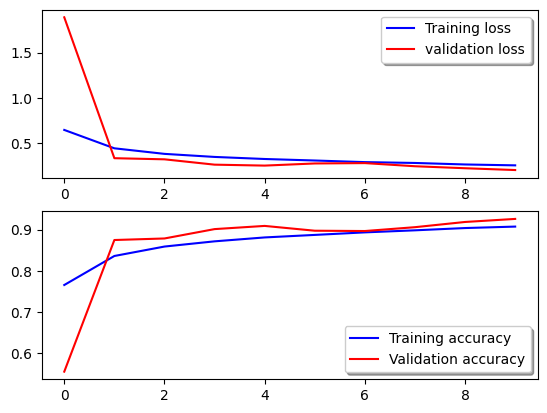

In [2]:
manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(manager.create_model(filters=64, dropout=0.2), batch_size=128, epochs=10
                           , compile_optimizer=RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, decay=1e-5) #, momentum=0.9) # momentum=0.5,
                           , fit_callbacks=[manager.learning_rate_reductor(patience=3, factor=0.5, min_lr=0.00001)]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.65 secs)
Epoch 1/10
375/375 [==============================] - 44s 113ms/step - loss: 0.6405 - accuracy: 0.7644 - val_loss: 3.4020 - val_accuracy: 0.3873 - lr: 0.0010
Epoch 2/10
375/375 [==============================] - 41s 109ms/step - loss: 0.4299 - accuracy: 0.8384 - val_loss: 0.3488 - val_accuracy: 0.8701 - lr: 0.0010
Epoch 3/10
375/375 [==============================] - 42s 111ms/step - loss: 0.3731 - accuracy: 0.8620 - val_loss: 0.2688 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 4/10
375/375 [==============================] - 40s 107ms/step - loss: 0.3387 - accuracy: 0.8735 - val_loss: 0.2996 - val_accuracy: 0.8872 - lr: 0.0010
Epoch 5/10
375/375 [==============================] - 41s 110ms/step - loss: 0.3167 - accuracy: 0.8827 - val_loss: 0.2438 - val_accuracy: 0.9074 - lr: 0.0010
Epoch 6/10
375/375 [==============================] - 39s 103ms/step - loss: 0.2999 - accuracy: 0.8889 - val_loss: 0.2889 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 7/10
375/37

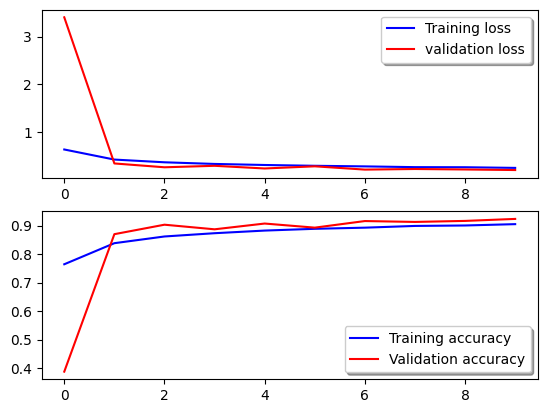

In [5]:
manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(manager.create_model(filters=64, dropout=0.2), batch_size=128, epochs=10
                           , compile_optimizer=RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, decay=1e-5) #, momentum=0.9) # momentum=0.5,
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.68 secs)
Epoch 1/50
375/375 [==============================] - 42s 106ms/step - loss: 0.6111 - accuracy: 0.7724 - val_loss: 1.6514 - val_accuracy: 0.5627 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 40s 107ms/step - loss: 0.4184 - accuracy: 0.8428 - val_loss: 0.4296 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - 38s 101ms/step - loss: 0.3753 - accuracy: 0.8605 - val_loss: 0.2921 - val_accuracy: 0.8886 - lr: 0.0010
Epoch 4/50
375/375 [==============================] - 52s 138ms/step - loss: 0.3383 - accuracy: 0.8726 - val_loss: 0.3807 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 5/50
375/375 [==============================] - 47s 124ms/step - loss: 0.3162 - accuracy: 0.8816 - val_loss: 0.2491 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 6/50
375/375 [==============================] - 49s 131ms/step - loss: 0.3000 - accuracy: 0.8894 - val_loss: 0.2303 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 7/50
375/37

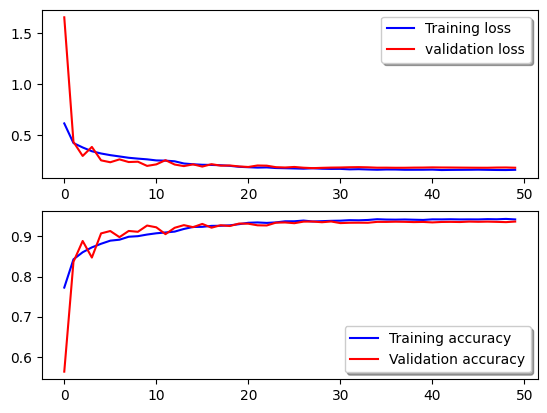

In [4]:
manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(manager.create_model(filters=64, dropout=0.2), batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, decay=1e-5) #, momentum=0.9) # momentum=0.5,
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.61 secs)
Epoch 1/10
375/375 [==============================] - 41s 103ms/step - loss: 0.8445 - accuracy: 0.6957 - val_loss: 2.0291 - val_accuracy: 0.2694 - lr: 1.0000e-04
Epoch 2/10
375/375 [==============================] - 38s 102ms/step - loss: 0.5993 - accuracy: 0.7786 - val_loss: 0.4163 - val_accuracy: 0.8443 - lr: 1.0000e-04
Epoch 3/10
375/375 [==============================] - 38s 100ms/step - loss: 0.5134 - accuracy: 0.8092 - val_loss: 0.3807 - val_accuracy: 0.8547 - lr: 1.0000e-04
Epoch 4/10
375/375 [==============================] - 38s 101ms/step - loss: 0.4624 - accuracy: 0.8289 - val_loss: 0.3406 - val_accuracy: 0.8737 - lr: 1.0000e-04
Epoch 5/10
375/375 [==============================] - 40s 106ms/step - loss: 0.4331 - accuracy: 0.8413 - val_loss: 0.3359 - val_accuracy: 0.8730 - lr: 1.0000e-04
Epoch 6/10
375/375 [==============================] - 39s 104ms/step - loss: 0.4083 - accuracy: 0.8525 - val_loss: 0.3013 - val_accuracy: 0.8884 - lr: 1.00

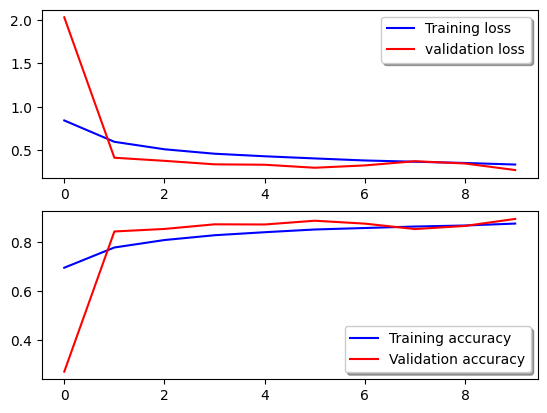

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))


manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=10
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 1.53 secs)
Epoch 1/50
375/375 [==============================] - 56s 137ms/step - loss: 0.5944 - accuracy: 0.7781 - val_loss: 2.1189 - val_accuracy: 0.4098 - lr: 5.0000e-04
Epoch 2/50
375/375 [==============================] - 46s 122ms/step - loss: 0.4097 - accuracy: 0.8484 - val_loss: 0.3044 - val_accuracy: 0.8852 - lr: 5.0000e-04
Epoch 3/50
375/375 [==============================] - 45s 121ms/step - loss: 0.3623 - accuracy: 0.8662 - val_loss: 0.2796 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 4/50
375/375 [==============================] - 45s 121ms/step - loss: 0.3284 - accuracy: 0.8788 - val_loss: 0.2745 - val_accuracy: 0.8956 - lr: 5.0000e-04
Epoch 5/50
375/375 [==============================] - 47s 126ms/step - loss: 0.3090 - accuracy: 0.8855 - val_loss: 0.2535 - val_accuracy: 0.9052 - lr: 5.0000e-04
Epoch 6/50
375/375 [==============================] - 52s 138ms/step - loss: 0.2948 - accuracy: 0.8904 - val_loss: 0.2244 - val_accuracy: 0.9172 - lr: 5.00

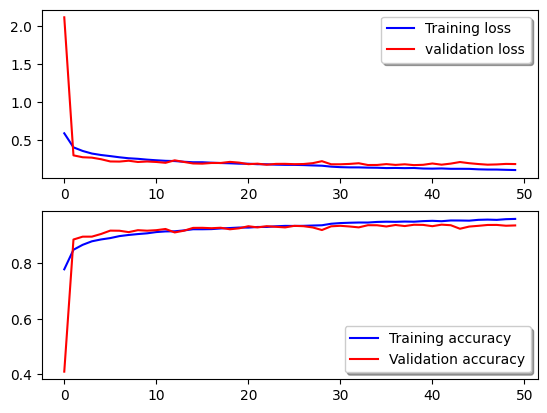

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

# model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 48s 121ms/step - loss: 0.2833 - accuracy: 0.8983 - val_loss: 0.2200 - val_accuracy: 0.9178 - lr: 5.0000e-04
Epoch 2/50
375/375 [==============================] - 47s 126ms/step - loss: 0.1963 - accuracy: 0.9270 - val_loss: 0.1900 - val_accuracy: 0.9334 - lr: 5.0000e-04
Epoch 3/50
375/375 [==============================] - 56s 148ms/step - loss: 0.1774 - accuracy: 0.9345 - val_loss: 0.1968 - val_accuracy: 0.9271 - lr: 5.0000e-04
Epoch 4/50
375/375 [==============================] - 48s 127ms/step - loss: 0.1656 - accuracy: 0.9381 - val_loss: 0.1808 - val_accuracy: 0.9347 - lr: 5.0000e-04
Epoch 5/50
375/375 [==============================] - 51s 136ms/step - loss: 0.1615 - accuracy: 0.9403 - val_loss: 0.1853 - val_accuracy: 0.9333 - lr: 5.0000e-04
Epoch 6/50
375/375 [==============================] - 54s 142ms/step - loss: 0.1552 - accuracy: 0.9433 - val_loss: 0.1932 - val_accuracy: 0.9331 - lr: 5.0000e-04
Epoch 7/50
375/375 [========

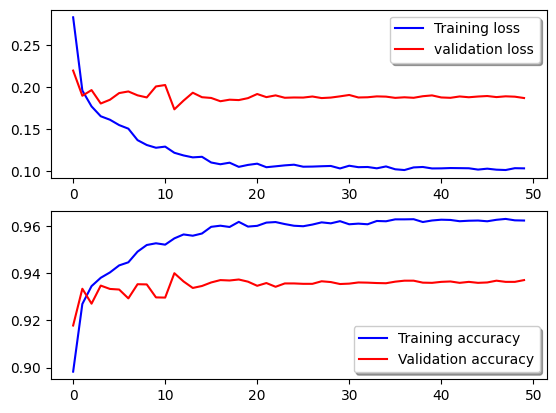

In [12]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

In [14]:
import joblib

filename = "cnn-model03-augmentation02.joblib"
joblib.dump(model, filename)

print("Model saved.")

INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


INFO:tensorflow:Assets written to: ram://648288e4-52fe-4e04-90ba-55db9a73987b/assets


Model saved.


In [11]:

kaggle_test_df = pd.read_csv('./input/kaggle_test.csv', sep=',')
kaggle_test_df


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,136,0,0,0,0,0,0,0,0,0
2,0,0,0,8,8,8,8,8,8,5,...,11,11,14,14,0,0,2,8,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,73,91,77,76,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,15,15,15,15,15,15,...,19,19,19,19,19,19,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import joblib
import numpy as np
import pandas as pd

test_np = np.array(kaggle_test_df, dtype='float32')
x_test1 = test_np / 255
x_test1 = x_test1.reshape(-1, 28, 28, 1)

model1 = joblib.load("cnn-model03-augmentation-acc-9399.joblib")
y_pred1 = np.argmax(model1.predict(x_test1), axis=-1)
y_pred1



 10/313 [..............................] - ETA: 3s

2023-03-14 16:58:20.354607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step


array([5, 1, 5, ..., 4, 5, 8])

In [22]:
preds_df = pd.DataFrame(y_pred1, index=None)
preds_df = preds_df.rename(columns={0: 'Category'})
preds_df['Id'] = preds_df.index
preds_df = preds_df.reindex(columns=['Id', 'Category'])

file = "submission-cnn-model03-augmentation-acc-9399-fixed3.csv"
preds_df.to_csv(file, index=False)

csv = pd.read_csv(file, index_col=None)
csv


,Id,Category
0,0,5
1,1,1
2,2,5
3,3,8
4,4,5
...,...,...
9995,9995,5
9996,9996,5
9997,9997,4
9998,9998,5


In [ ]:
import joblib
import numpy as np
from sklearn.metrics import classification_report

test_np = np.array(test_df, dtype='float32')
x_test = test_np[:, 1:] / 255
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = test_df.iloc[:, 0]
filename = "cnn-model03-augmentation02.joblib"

model1 = joblib.load(filename)
y_pred = np.argmax(model1.predict(x_test), axis=-1)

print(classification_report(y_test, y_pred, target_names=class_names, digits=4))


(Preprocessing: Done in 0.65 secs)
Epoch 1/100


2023-03-10 22:53:03.481569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 48s 124ms/step - loss: 0.7400 - accuracy: 0.7300 - val_loss: 1.9295 - val_accuracy: 0.2695 - lr: 1.0000e-04
Epoch 2/100
375/375 [==============================] - 47s 125ms/step - loss: 0.5408 - accuracy: 0.7986 - val_loss: 0.3793 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 3/100
375/375 [==============================] - 45s 120ms/step - loss: 0.4738 - accuracy: 0.8227 - val_loss: 0.3501 - val_accuracy: 0.8692 - lr: 1.0000e-04
Epoch 4/100
375/375 [==============================] - 45s 120ms/step - loss: 0.4308 - accuracy: 0.8424 - val_loss: 0.3279 - val_accuracy: 0.8786 - lr: 1.0000e-04
Epoch 5/100
375/375 [==============================] - 42s 113ms/step - loss: 0.4012 - accuracy: 0.8521 - val_loss: 0.3103 - val_accuracy: 0.8867 - lr: 1.0000e-04
Epoch 6/100
375/375 [==============================] - 41s 109ms/step - loss: 0.3783 - accuracy: 0.8598 - val_loss: 0.2757 - val_accuracy: 0.9003 - lr: 1.0000e-04
Epoch 7/100
375/375 [=============

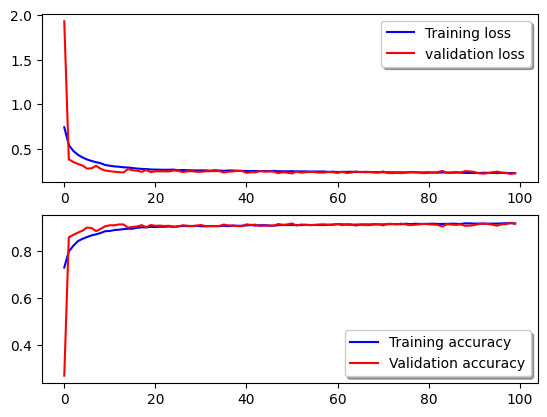

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.68 secs)
Epoch 1/100
375/375 [==============================] - 36s 93ms/step - loss: 0.6476 - accuracy: 0.7627 - val_loss: 1.1195 - val_accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
375/375 [==============================] - 34s 90ms/step - loss: 0.4967 - accuracy: 0.8152 - val_loss: 0.3553 - val_accuracy: 0.8717 - lr: 1.0000e-04
Epoch 3/100
375/375 [==============================] - 34s 91ms/step - loss: 0.4509 - accuracy: 0.8355 - val_loss: 0.3316 - val_accuracy: 0.8759 - lr: 1.0000e-04
Epoch 4/100
375/375 [==============================] - 35s 93ms/step - loss: 0.4200 - accuracy: 0.8445 - val_loss: 0.3374 - val_accuracy: 0.8698 - lr: 1.0000e-04
Epoch 5/100
375/375 [==============================] - 34s 91ms/step - loss: 0.3958 - accuracy: 0.8533 - val_loss: 0.2962 - val_accuracy: 0.8900 - lr: 1.0000e-04
Epoch 6/100
375/375 [==============================] - 34s 91ms/step - loss: 0.3842 - accuracy: 0.8588 - val_loss: 0.2755 - val_accuracy: 0.9022 - lr: 1.00

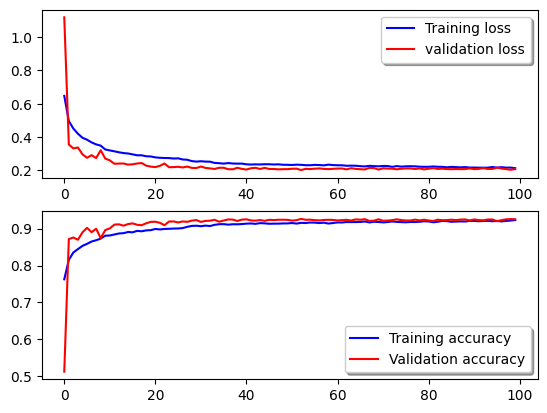

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

# model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.56 secs)
Epoch 1/100
375/375 [==============================] - 34s 89ms/step - loss: 0.7360 - accuracy: 0.7296 - val_loss: 1.5657 - val_accuracy: 0.4793 - lr: 1.0000e-04
Epoch 2/100
375/375 [==============================] - 35s 94ms/step - loss: 0.5509 - accuracy: 0.7948 - val_loss: 0.4058 - val_accuracy: 0.8547 - lr: 1.0000e-04
Epoch 3/100
375/375 [==============================] - 32s 85ms/step - loss: 0.4906 - accuracy: 0.8179 - val_loss: 0.3846 - val_accuracy: 0.8505 - lr: 1.0000e-04
Epoch 4/100
375/375 [==============================] - 32s 85ms/step - loss: 0.4507 - accuracy: 0.8328 - val_loss: 0.3619 - val_accuracy: 0.8618 - lr: 1.0000e-04
Epoch 5/100
375/375 [==============================] - 33s 87ms/step - loss: 0.4223 - accuracy: 0.8439 - val_loss: 0.3168 - val_accuracy: 0.8846 - lr: 1.0000e-04
Epoch 6/100
375/375 [==============================] - 35s 93ms/step - loss: 0.4046 - accuracy: 0.8503 - val_loss: 0.3256 - val_accuracy: 0.8787 - lr: 1.00

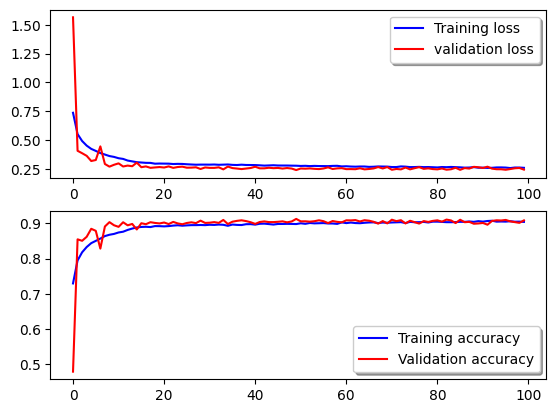

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))

# model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
# model.add(Dropout(dropout))

model.add(Conv2D(filters=filters, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0001, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

(Preprocessing: Done in 0.54 secs)
Epoch 1/100
375/375 [==============================] - 47s 120ms/step - loss: 0.6465 - accuracy: 0.7566 - val_loss: 0.4900 - val_accuracy: 0.8173 - lr: 5.0000e-04
Epoch 2/100
375/375 [==============================] - 44s 117ms/step - loss: 0.4395 - accuracy: 0.8349 - val_loss: 0.3259 - val_accuracy: 0.8767 - lr: 5.0000e-04
Epoch 3/100
375/375 [==============================] - 44s 118ms/step - loss: 0.3821 - accuracy: 0.8571 - val_loss: 0.3575 - val_accuracy: 0.8662 - lr: 5.0000e-04
Epoch 4/100
375/375 [==============================] - 44s 118ms/step - loss: 0.3469 - accuracy: 0.8709 - val_loss: 0.2716 - val_accuracy: 0.8982 - lr: 5.0000e-04
Epoch 5/100
375/375 [==============================] - 44s 118ms/step - loss: 0.3205 - accuracy: 0.8805 - val_loss: 0.2839 - val_accuracy: 0.8903 - lr: 5.0000e-04
Epoch 6/100
375/375 [==============================] - 44s 118ms/step - loss: 0.3038 - accuracy: 0.8880 - val_loss: 0.2923 - val_accuracy: 0.8832 - lr

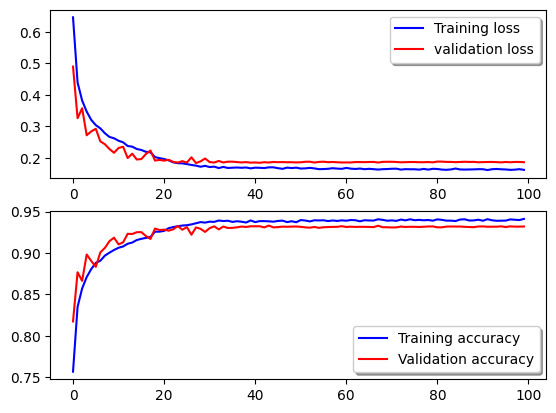

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

filters = 64
dropout = 0.2
first_kernel=(5, 5)
second_kernel=(3, 3)
pool_size=(2, 2)

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters, kernel_size=first_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout))
model.add(Conv2D(filters=filters*2, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filters*3, kernel_size=second_kernel, padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=pool_size, strides=(2, 2)))
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(len(class_names), activation="softmax"))

manager = SimpleImgClassificatorManager(train_df, test_df, class_names)
manager.preprocess_image_data()
manager.compile_fit_report(model, batch_size=128, epochs=100
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.9999, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()

Epoch 1/50
375/375 [==============================] - 46s 119ms/step - loss: 0.1954 - accuracy: 0.9270 - val_loss: 0.2101 - val_accuracy: 0.9219 - lr: 5.0000e-04
Epoch 2/50
375/375 [==============================] - 45s 119ms/step - loss: 0.1846 - accuracy: 0.9313 - val_loss: 0.2183 - val_accuracy: 0.9187 - lr: 5.0000e-04
Epoch 3/50
375/375 [==============================] - 44s 117ms/step - loss: 0.1841 - accuracy: 0.9314 - val_loss: 0.1902 - val_accuracy: 0.9290 - lr: 5.0000e-04
Epoch 4/50
375/375 [==============================] - 44s 117ms/step - loss: 0.1812 - accuracy: 0.9316 - val_loss: 0.1810 - val_accuracy: 0.9349 - lr: 5.0000e-04
Epoch 5/50
375/375 [==============================] - 44s 117ms/step - loss: 0.1812 - accuracy: 0.9324 - val_loss: 0.1855 - val_accuracy: 0.9303 - lr: 5.0000e-04
Epoch 6/50
375/375 [==============================] - 44s 117ms/step - loss: 0.1757 - accuracy: 0.9359 - val_loss: 0.1964 - val_accuracy: 0.9280 - lr: 5.0000e-04
Epoch 7/50
375/375 [========

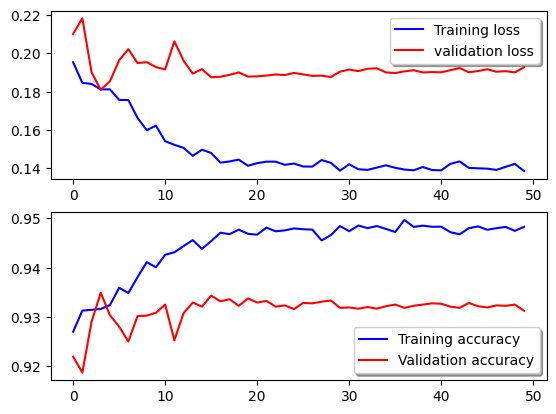

In [9]:
manager.compile_fit_report(model, batch_size=128, epochs=50
                           , compile_optimizer=RMSprop(learning_rate=0.0005, rho=0.99, epsilon=1e-08, decay=1e-5)
                           , fit_callbacks=[manager.learning_rate_reductor()]
                           , img_data_generator=manager.image_data_generator())
manager.evaluate_report()